In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from time import time

In [5]:
gaz_zcta_years = [2000, 2010, 2012, 2013, 2014, 2015, 2016]
gaz_zcta = []
for y in gaz_zcta_years:
    fname = 'gaz_zcta' + str(y) + '.csv'
    gaz = pd.read_csv(fname, header=(0), dtype={'GEOID':str, 'ALAND':float})
    gaz_zcta.append(gaz)

print(len(gaz_zcta), '/', len(gaz_zcta_years))

def which_gaz(year):
    test = [abs(year-zear) for zear in gaz_zcta_years]
    return gaz_zcta[test.index(min(test))]

7 / 7


In [6]:
class Year_read:
    def __init__(self, prefix, year):
        self.year = year
        self.gaz = which_gaz(year)

        fname = prefix + str(year) + '.csv'
        df = pd.read_csv(fname, header=(0), dtype={'EMP':int, 'ZIP':str, 'rho':float})
        self.zbp = df[['GEO_TTL', 'GEOID', 'EMP', 'ZIP']]
        self.rho = df[['index_gaz', 'rho']]
  
    def citify(self, cities):
        self.city = []
        for city in cities:
            temp = self.zbp.GEO_TTL.str.find(city)
            self.city.append([i for i,j in enumerate(temp) if j != -1])
            
    def citify2(self, cities):
        self.city = []
        for city in cities:
            df = self.zbp[self.zbp['GEO_TTL'] == city]
            self.city.append(df)

cities = ['Los Angeles', 'San Antonio, TX', 'Orlando, FL']
years = np.arange(1999, 2011)
dat = []
for y in years:
    dat.append(Year_read('dat', y))
    dat[-1].citify(cities)

In [34]:
print(dat[-1].year)
plt.hist(dat[-1].zbp.rho, bins=500*np.arange(100))
plt.show()


2010


AttributeError: 'DataFrame' object has no attribute 'rho'

In [4]:
cities = ['Los Angeles', 'San Antonio, TX', 'Orlando, FL']
years = np.arange(1999, 2011)
dat = []

for y in years:
    dat.append(Year_read('dat', y))
    dat[-1].citify2(cities)

NameError: name 'Year_read' is not defined

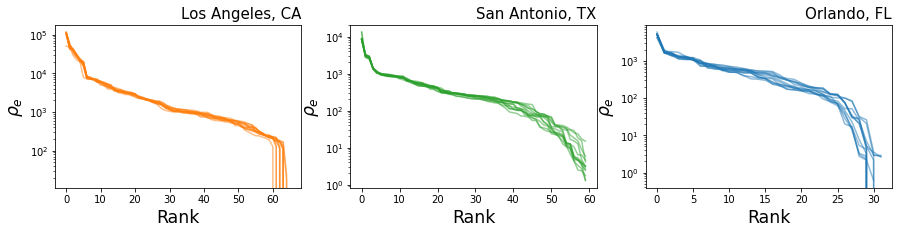

In [36]:
fig, axs = plt.subplots(1,3,figsize=(15,3))

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel('Rank', fontsize='xx-large')
    ax.set_ylabel('$ρ_e$', fontsize='xx-large')

fs_title = 15
axs[0].set_title('Los Angeles, CA', fontsize=fs_title, loc='right')
axs[1].set_title('San Antonio, TX', fontsize=fs_title, loc='right')
axs[2].set_title('Orlando, FL', fontsize=fs_title, loc='right')

cut = [80, 60, 40]
palette = ['tab:orange', 'tab:green', 'tab:blue']
for i in range(len(cities)):
    X = np.arange(cut[i])
    for d in dat:
#       Y = d.rho.loc[d.city[i]].sort_values(by='rho', ascending=False)['rho'][:cut[i]]
        Y = d.city[i].sort_values(by='rho', ascending=False)['rho'][:cut[i]]
        axs[i].plot(X, Y, color=palette[i], alpha=0.5, label=d.year)
#     axs[i].legend(loc='upper right')

plt.show()

In [16]:
dat[0].city[2].sort_values(by='ZIP')

,GEO_TTL,GEOID,EMP,ZIP
5110,"Orlando, FL",8600000US32801,24704,32801
5113,"Orlando, FL",8600000US32802,1744,32802
5125,"Orlando, FL",8600000US32803,29905,32803
5126,"Orlando, FL",8600000US32804,13521,32804
5111,"Orlando, FL",8600000US32805,9843,32805
5114,"Orlando, FL",8600000US32806,22036,32806
5107,"Orlando, FL",8600000US32807,8655,32807
5123,"Orlando, FL",8600000US32808,13948,32808
5104,"Orlando, FL",8600000US32809,33230,32809
4976,"Orlando, FL",8600000US32810,16442,32810
